# Name: Jugal Deshmukh
# Task-12 (Exploratory Data Analysis)
# PUBG Dataset

## Steps To Perform EDA on PUBG Dataset

### Step 1: Introduction about the data, data description and objective
### Step 2: File description and data fields
### Step 3: Import all the required libraries
### Step 4: Load the dataset
### Step 5: Perform the univariate and bivariate analysis on the dataset
### Step 6: Observations after every plot
### Step 7: Conclusion

## Data Description

In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.


## File description
### pubgdata - This file includes the complete pubg game dataset

## Data Fields
1. DBNOs - Number of enemy players knocked.
2. assists - Number of enemy players this player damaged that were killed by teammates.
3.	boosts - Number of boost items used.
4.	damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
5.	headshotKills - Number of enemy players killed with headshots.
6.	heals - Number of healing items used.
7.	Id - Player’s Id
8.	killPlace - Ranking in match of number of enemy players killed.
9.	killPoints - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10.	killStreaks - Max number of enemy players killed in a short amount of time.
11.	kills - Number of enemy players killed.
12.	longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
13.	matchDuration - Duration of match in seconds.
14.	matchId - ID to identify matches. There are no matches that are in both the training and testing set.
15.	matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16.	rankPoints - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
17.	revives - Number of times this player revived teammates.
18.	rideDistance - Total distance traveled in vehicles measured in meters.
19.	roadKills - Number of kills while in a vehicle.
20.	swimDistance - Total distance traveled by swimming measured in meters.
21. teamKills - Number of times this player killed a teammate.
22.	vehicleDestroys - Number of vehicles destroyed.
23.	walkDistance - Total distance traveled on foot measured in meters.
24. weaponsAcquired - Number of weapons picked up.
25. winPoints - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. numGroups - Number of groups we have data for in the match.
28. maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
29. winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
#data loading 
pubg = pd.read_csv("C:/Users/princ/Innomatics-Tasks/pubgdata.csv")

In [3]:
pubg

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [4]:
#shows the first 5 rows of the dataset
pubg.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [5]:
#shows the last 5 rows of the dataset
pubg.tail()
#this shows that it is a very large dataset

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
1111741,609836,9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [6]:
#performs below statistical analysis for each column values of the dataset
pubg.describe()

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.224362e+06,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,1.283879e+06,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.112440e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,2.223772e+06,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,3.337954e+06,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,4.446964e+06,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [7]:
#shows the dimensions of the dataset
pubg.shape

(1111742, 30)

In [8]:
pubg.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [9]:
#check for the unique values for each column
pubg.nunique()

Unnamed: 0         1111742
Id                 1111742
groupId             870622
matchId              47951
assists                 16
boosts                  23
damageDealt          23831
DBNOs                   31
headshotKills           26
heals                   55
killPlace              100
killPoints            1489
kills                   49
killStreaks             15
longestKill          24433
matchDuration         1263
matchType               16
maxPlace               100
numGroups              100
rankPoints            1707
revives                 20
rideDistance         24564
roadKills               11
swimDistance         20702
teamKills                7
vehicleDestroys          6
walkDistance         32651
weaponsAcquired         75
winPoints             1160
winPlacePerc          2557
dtype: int64

In [10]:
#to check the null values in the dataset
pubg.isnull().sum()
#there are no null values in the dataset

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

### We are having one missing value in winPlacePerc column

In [11]:
#categorical features
categorical = pubg.select_dtypes(include=[np.object])
print("categorical features in the dataset:",categorical.shape[1])

#numerical features
numerical = pubg.select_dtypes(include=[np.float64,np.int64])
print("numerical features in the dataset:",numerical.shape[1])

categorical features in the dataset: 4
numerical features in the dataset: 26


In [12]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [13]:
#performing the valuecounts for the matchType column in the dataset
pubg['matchType'].value_counts()

squad-fpp           438781
duo-fpp             249927
squad               156573
solo-fpp            133854
duo                  78039
solo                 45679
normal-squad-fpp      4286
crashfpp              1581
normal-duo-fpp        1400
flaretpp               633
normal-solo-fpp        465
flarefpp               180
normal-squad           135
crashtpp                86
normal-solo             75
normal-duo              48
Name: matchType, dtype: int64

In [14]:
pubg.groupby('matchType')['winPlacePerc'].count()

matchType
crashfpp              1581
crashtpp                86
duo                  78039
duo-fpp             249927
flarefpp               180
flaretpp               633
normal-duo              48
normal-duo-fpp        1400
normal-solo             75
normal-solo-fpp        465
normal-squad           135
normal-squad-fpp      4286
solo                 45679
solo-fpp            133853
squad               156573
squad-fpp           438781
Name: winPlacePerc, dtype: int64

In [15]:
print('Id count:',pubg['Id'].nunique())
print('Group Id count:',pubg['groupId'].nunique())
print('Match Id count:',pubg['matchId'].nunique())

Id count: 1111742
Group Id count: 870622
Match Id count: 47951


Mean: 1579.347832500706
Median: 1438.0
Min: 9
Max: 2237


{'whiskers': [<matplotlib.lines.Line2D at 0x1f308db5710>,
 'caps': [<matplotlib.lines.Line2D at 0x1f308db5c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f308db5390>],
 'medians': [<matplotlib.lines.Line2D at 0x1f309460278>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f309460550>],
 'means': []}

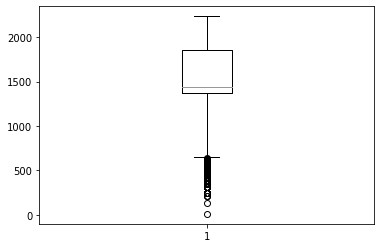

In [16]:
#Let us now visualize the matchDuration column of the dataset
print("Mean:",pubg['matchDuration'].mean())
print("Median:",pubg['matchDuration'].median())
print("Min:",pubg['matchDuration'].min())
print("Max:",pubg['matchDuration'].max())


plt.boxplot(pubg['matchDuration'])
plt.show()


### In matchDuration, we can see that there are many values which are extremely low. These are the low value outliers. The Boxplot helps us to visualize and identify the outliers in a dataset. It also helps us in visualizing the mean,median and IQR.

<AxesSubplot:xlabel='matchDuration', ylabel='Density'>

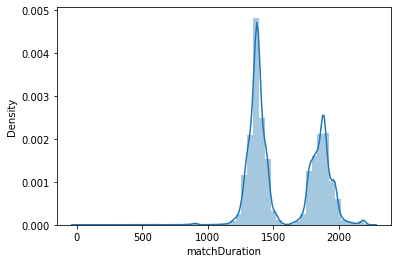

In [17]:
#the distribution of matchDuration column
sns.distplot(pubg['matchDuration'])

<AxesSubplot:xlabel='rideDistance', ylabel='Density'>

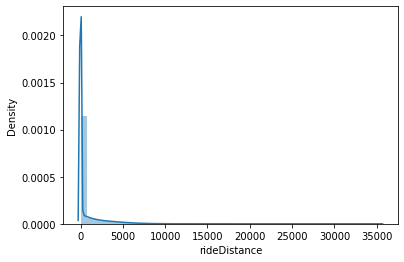

In [18]:
#the distribution of rideDistance column
sns.distplot(pubg['rideDistance'])


<AxesSubplot:xlabel='walkDistance', ylabel='Density'>

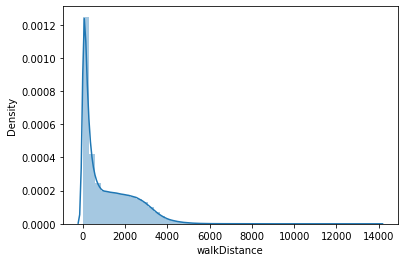

In [19]:
#the distribution of walkDistance column
sns.distplot(pubg['walkDistance'])

<AxesSubplot:xlabel='swimDistance', ylabel='Density'>

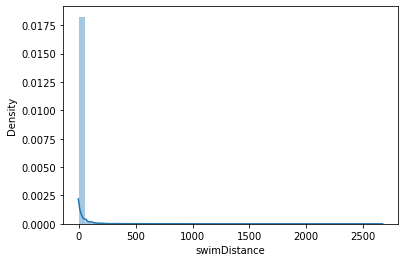

In [20]:
#the distribution of swimDistance column
sns.distplot(pubg['swimDistance'])

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='matchType', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'squad-fpp'),
  Text(1, 0, 'solo-fpp'),
  Text(2, 0, 'solo'),
  Text(3, 0, 'duo'),
  Text(4, 0, 'duo-fpp'),
  Text(5, 0, 'squad'),
  Text(6, 0, 'normal-squad-fpp'),
  Text(7, 0, 'normal-duo-fpp'),
  Text(8, 0, 'normal-solo-fpp'),
  Text(9, 0, 'crashfpp'),
  Text(10, 0, 'crashtpp'),
  Text(11, 0, 'normal-squad'),
  Text(12, 0, 'flaretpp'),
  Text(13, 0, 'flarefpp'),
  Text(14, 0, 'normal-duo'),
  Text(15, 0, 'normal-solo')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'squad-fpp'),
  Text(1, 0, 'solo-fpp'),
  Text(2, 0, 'solo'),
  Text(3, 0, 'duo'),
  Text(4, 0, 'duo-fpp'),
  Text(5, 0, 'squad'),
  Text(6, 0, 'normal-squad-fpp'),
  Text(7, 0, 'normal-duo-fpp'),
  Text(8, 0, 'normal-solo-fpp'),
  Text(9, 0, 'crashfpp'),
  Text(10, 0, 'crashtpp'),
  Text(11, 0, 'normal-squad'),
  Text(12, 0, 'flaretpp'),
  Text(13, 0, 'flarefpp'),
  Text(14, 0, 'normal-duo'),
  Text(15, 0, 'normal-solo')])

(array([     0., 100000., 200000., 300000., 400000., 500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

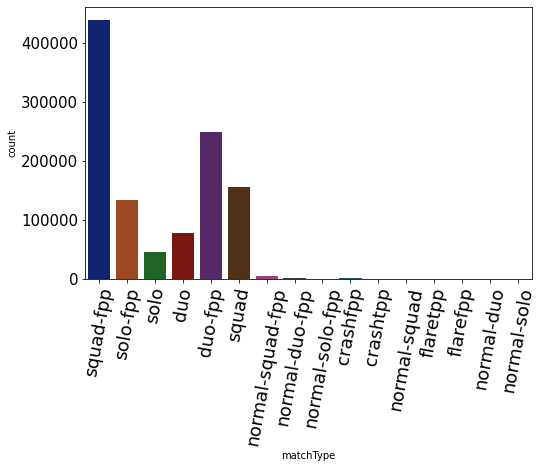

In [21]:
#now let us visualize the matchType using the countplot
plt.figure(figsize=(8,5))
sns.countplot(pubg['matchType'],data=pubg,palette='dark')
plt.xticks(fontsize=18)
plt.xticks(rotation=80)
plt.yticks(fontsize=15)
plt.show()

### From the above countplot we can see that the player count is highest for squad-fpp matchType

<Figure size 576x360 with 0 Axes>

<AxesSubplot:xlabel='kills', ylabel='count'>

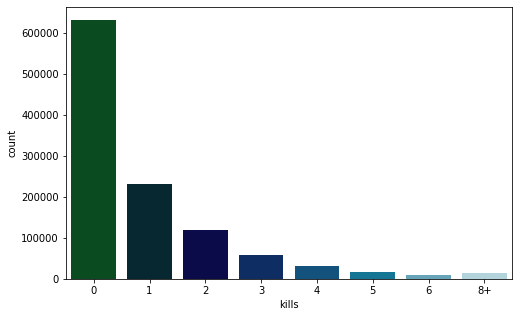

In [22]:
#now let us visualize the kills column using countplot

pubg1 = pubg.copy()
pubg1.loc[pubg1['kills'] > pubg1['kills'].quantile(0.98)] = '8+'
plt.figure(figsize=(8,5))
sns.countplot(pubg1['kills'].astype('str').sort_values(),data=pubg1,palette='ocean')


### The above kills countplot states that as the number of kills increases the count is decreasing. And the players with 0 kills are the highest

<Figure size 1152x720 with 0 Axes>

<AxesSubplot:xlabel='kills', ylabel='count'>

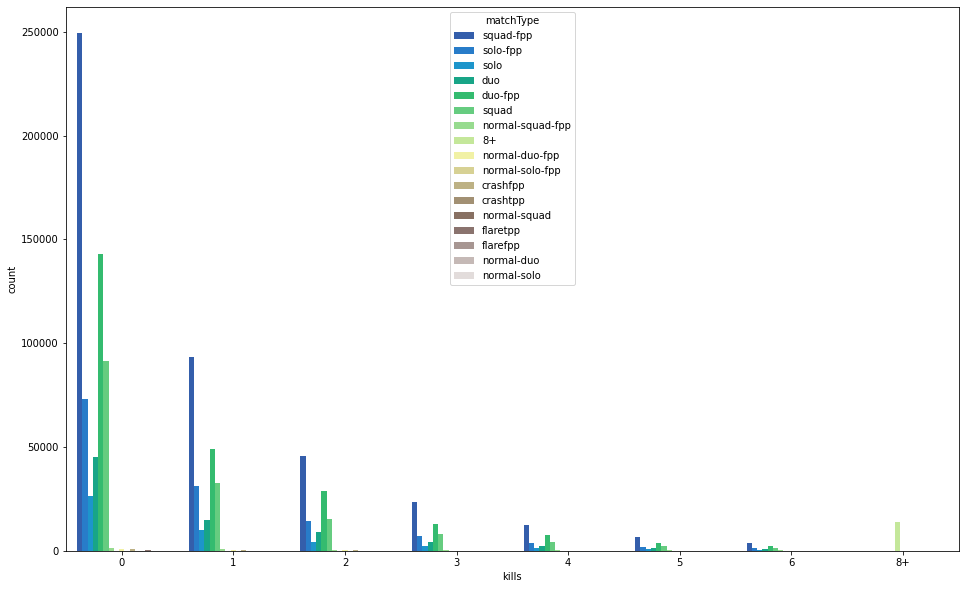

In [23]:
#now let us visualize the kills column using countplot
#but this time using matchType column into consideration

pubg1 = pubg.copy()
pubg1.loc[pubg1['kills'] > pubg1['kills'].quantile(0.98)] = '8+'
plt.figure(figsize=(16,10))
sns.countplot(pubg1['kills'].astype('str').sort_values(),data=pubg1,palette='terrain',hue='matchType')

### The players who are playing matchType squad-fpp are killing more enemies

<AxesSubplot:xlabel='killsCategories', ylabel='winPlacePerc'>

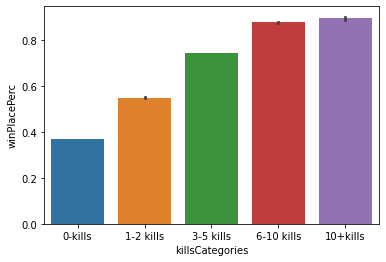

In [24]:
#using barplot to visualize the number of kills
pubg2=pubg.copy()
pubg2['killsCategories']=pd.cut(pubg2['kills'],[-1,0,2,5,10,60], labels=['0-kills','1-2 kills','3-5 kills','6-10 kills','10+kills'])
sns.barplot(x='killsCategories',y='winPlacePerc',data=pubg2)

### The chance of winning the match is lower when there are 0 kills as compared to other killCategories

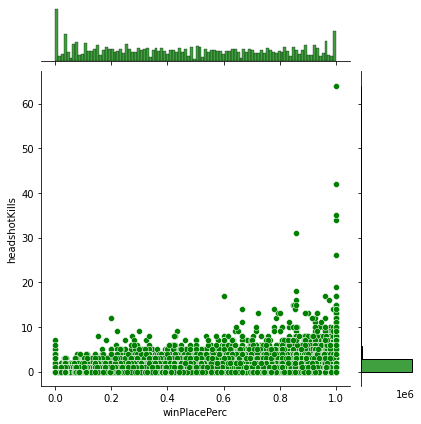

In [25]:
#jointplot for relational analysis between winPlacePerc and headshotKills columns 
sns.jointplot(x='winPlacePerc',y='headshotKills',data=pubg,color='green')

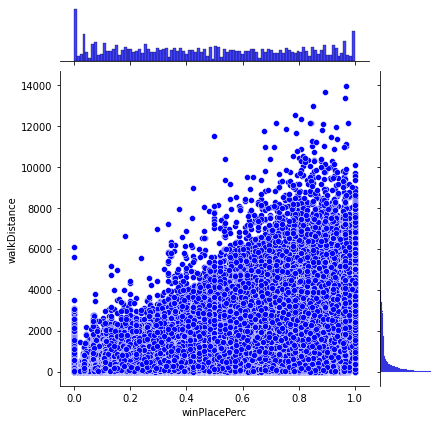

In [26]:
#jointplot for relational analysis between winPlacePerc and walkDistance columns 
sns.jointplot(x='winPlacePerc',y='walkDistance',data=pubg,color='blue')

### walkDistance column has higher correlation with the winPlacePerc column

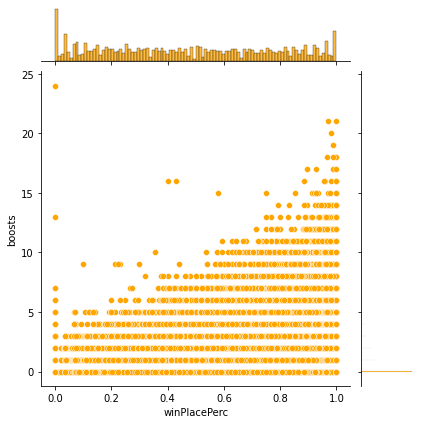

In [33]:
#jointplot for relational analysis between winPlacePerc and boosts columns 
sns.jointplot(x='winPlacePerc',y='boosts',data=pubg,color='orange')

### The boosts column shows a higher correlation with winPlacePerc. However the boosts aswell as the heals show abnormal behaviour at 0

(<Figure size 720x360 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='vehicleDestroys', ylabel='winPlacePerc'>

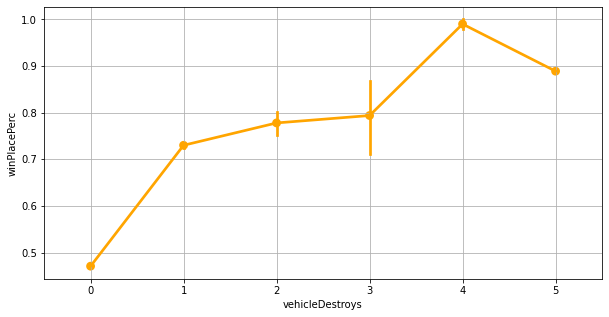

In [27]:
plt.subplots(figsize=(10,5))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=pubg,color='orange',alpha=0.7)
plt.grid()
plt.show()

### The chances of winning a match is higher when people are destroying vehicles

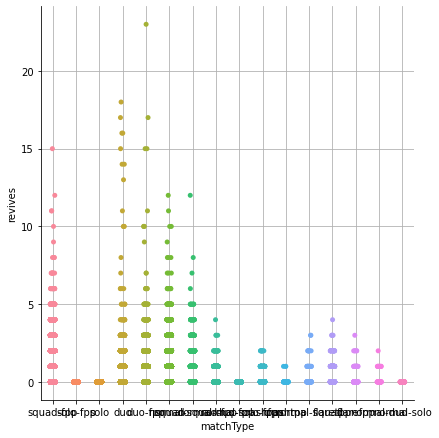

In [28]:
sns.catplot(x='matchType',y='revives',data=pubg,height=6)
plt.grid()
plt.show()


(<Figure size 1080x504 with 1 Axes>, <AxesSubplot:>)

<AxesSubplot:xlabel='heals', ylabel='winPlacePerc'>

<AxesSubplot:xlabel='boosts', ylabel='winPlacePerc'>

Text(0.5, 1.0, 'Heals vs Boosts')

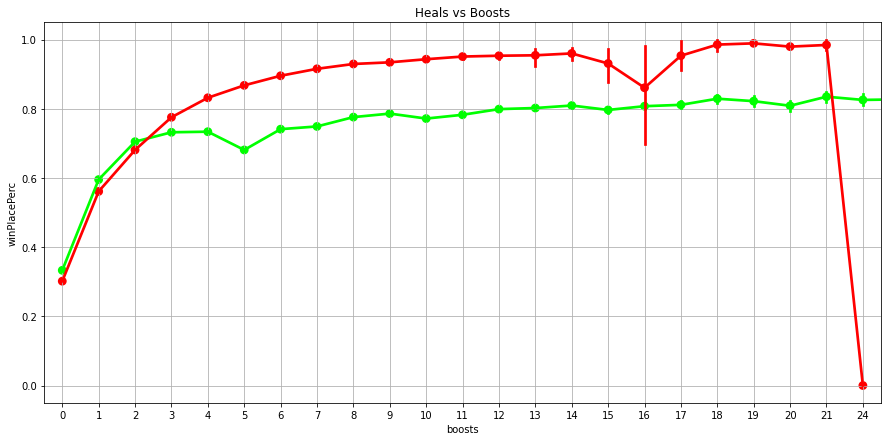

In [29]:
pubg3=pubg.copy()
pubg3=pubg3[pubg['heals'] < pubg['heals'].quantile(0.99)]
pubg3=pubg3[pubg['boosts'] < pubg['boosts'].quantile(0.99)]

plt.subplots(figsize=(15,7))
sns.pointplot(x='heals',y='winPlacePerc',data=pubg,color='lime',alpha=0.9)
sns.pointplot(x='boosts',y='winPlacePerc',data=pubg,color='red',alpha=0.9)

plt.title('Heals vs Boosts')
plt.grid()
plt.show()


### The number of winning percentage for boosts is higher as compared to the heals

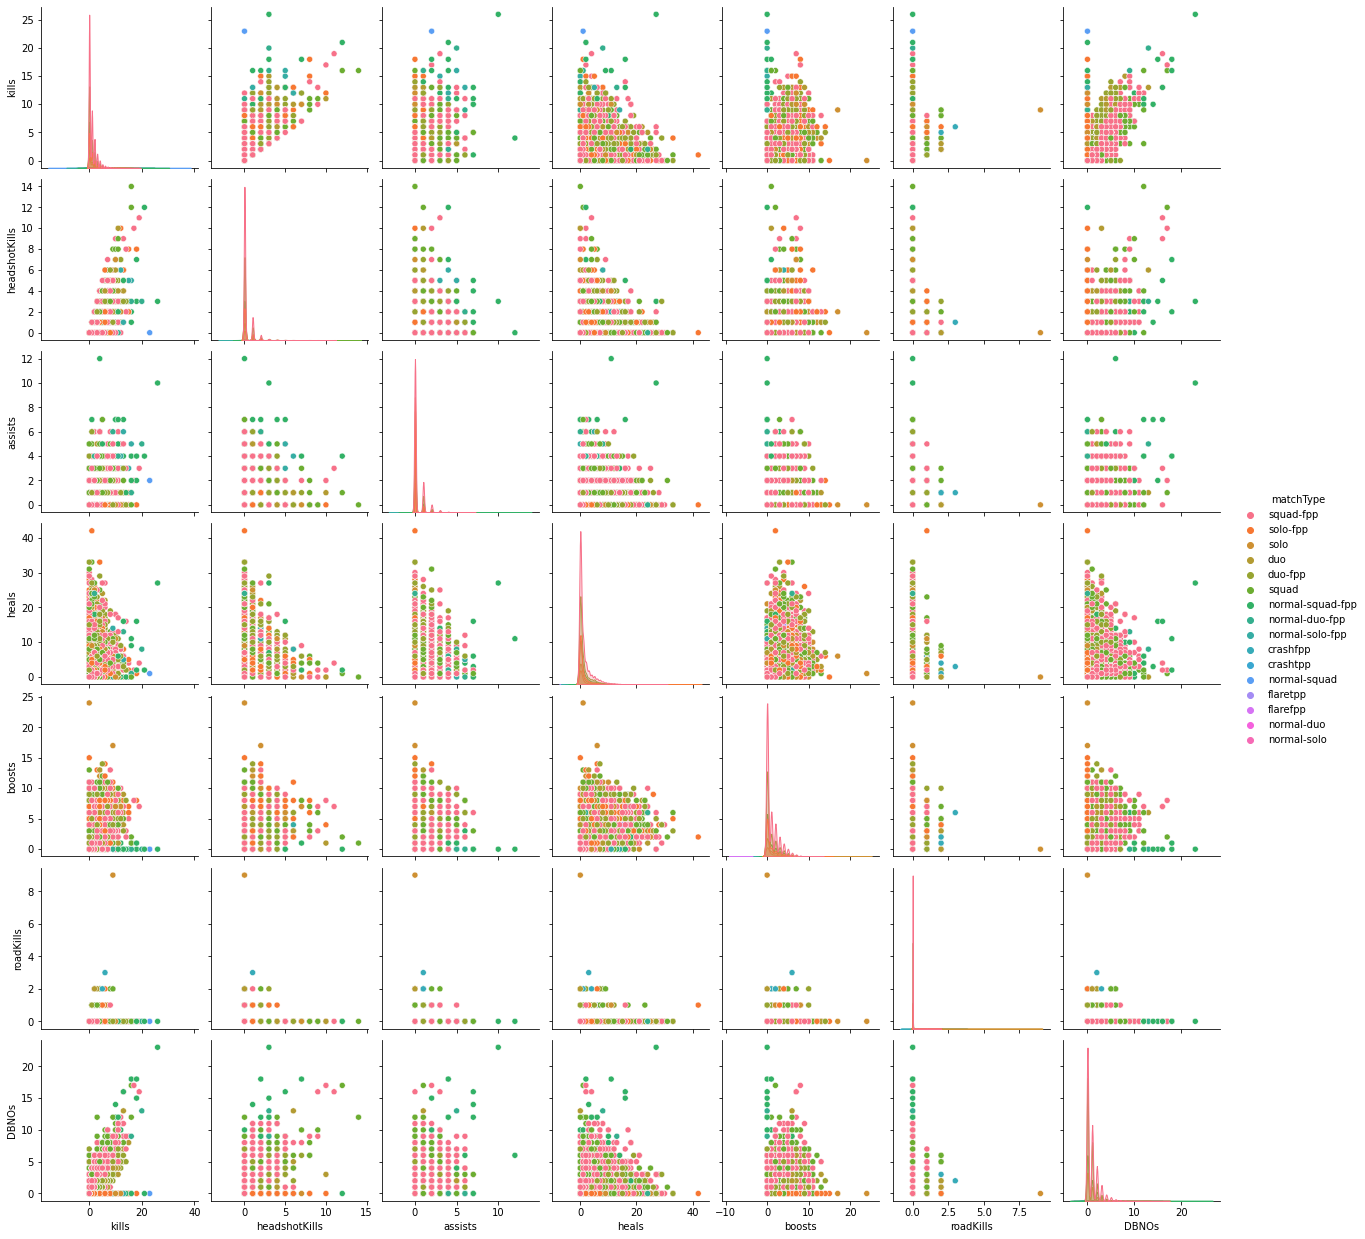

In [30]:
pubg1=pubg[['kills','headshotKills','assists','heals','boosts','roadKills','matchType','DBNOs']]
sns.pairplot(pubg1[:50000], hue='matchType')

In [31]:
#displaying the correlation of the dataset columns 
Corr = pubg.drop(['Unnamed: 0'],axis=1).corr()
Corr

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289984,0.038331,0.322068,0.243386,...,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244595,0.023341,0.297738
boosts,0.306582,1.000000,0.519600,0.357903,0.331536,0.535388,-0.554046,0.008992,0.499478,0.403484,...,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676134,0.050217,0.889038,0.703222,...,0.256318,0.139840,0.050660,0.037509,0.016209,0.079901,0.396621,0.354515,0.017990,0.438973
DBNOs,0.302200,0.357903,0.735084,1.000000,0.467393,0.265348,-0.554858,0.042139,0.706211,0.646344,...,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284051,0.217667,0.010483,0.279322
headshotKills,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468079,0.024203,0.673739,0.513207,...,0.149131,0.076275,0.011974,0.029988,0.009198,0.039857,0.249591,0.215613,0.005029,0.276170
heals,0.228456,0.535388,0.341620,0.265348,0.197936,1.000000,-0.385497,-0.001990,0.310537,0.268948,...,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308229,-0.010303,0.427296
killPlace,-0.289984,-0.554046,-0.676134,-0.554858,-0.468079,-0.385497,1.000000,-0.023594,-0.728966,-0.809669,...,-0.270056,-0.236371,-0.057496,-0.089924,-0.039589,-0.072698,-0.590130,-0.489741,-0.002611,-0.719051
killPoints,0.038331,0.008992,0.050217,0.042139,0.024203,-0.001990,-0.023594,1.000000,0.036511,0.037883,...,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004883,-0.004246,0.983443,0.013089
kills,0.322068,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728966,0.036511,1.000000,0.802054,...,0.253223,0.114665,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527
killStreaks,0.243386,0.403484,0.703222,0.646344,0.513207,0.268948,-0.809669,0.037883,0.802054,1.000000,...,0.241888,0.098000,0.065413,0.034264,0.030051,0.062697,0.326998,0.275111,0.009182,0.376840


### The above table shows us the correlation between all the pubg data features. Correlation tells us how many variables in the dataset are dependent or independent with each other. The correlation value falls between -1 and +1

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0.5, 0, 'assists'),
  Text(1.5, 0, 'boosts'),
  Text(2.5, 0, 'damageDealt'),
  Text(3.5, 0, 'DBNOs'),
  Text(4.5, 0, 'headshotKills'),
  Text(5.5, 0, 'heals'),
  Text(6.5, 0, 'killPlace'),
  Text(7.5, 0, 'killPoints'),
  Text(8.5, 0, 'kills'),
  Text(9.5, 0, 'killStreaks'),
  Text(10.5, 0, 'longestKill'),
  Text(11.5, 0, 'matchDuration'),
  Text(12.5, 0, 'maxPlace'),
  Text(13.5, 0, 'numGroups'),
  Text(14.5, 0, 'rankPoints'),
  Text(15.5, 0, 'revives'),
  Text(16.5, 0, 'rideDistance'),
  Text(17.5, 0, 'roadKills'),
  Text(18.5, 0, 'swimDistance'),
  Text(19.5, 0, 'teamKills'),
  Text(20.5, 0, 'vehicleDestroys'),
  Text(21.5, 0, 'walkDistance'),
  Text(22.5, 0, 'weaponsAcquired'),
  Text(23.5, 0, 'winPoints'),
  Text(24.5, 0, 'winPlacePerc')])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]),
 [Text(0, 0.5, 'assists'),
  Text(0, 1.5, 'boosts'),
  Text(0, 2.5, 'damageDealt'),
  Text(0, 3.5, 'DBNOs'),
  Text(0, 4.5, 'headshotKills'),
  Text(0, 5.5, 'heals'),
  Text(0, 6.5, 'killPlace'),
  Text(0, 7.5, 'killPoints'),
  Text(0, 8.5, 'kills'),
  Text(0, 9.5, 'killStreaks'),
  Text(0, 10.5, 'longestKill'),
  Text(0, 11.5, 'matchDuration'),
  Text(0, 12.5, 'maxPlace'),
  Text(0, 13.5, 'numGroups'),
  Text(0, 14.5, 'rankPoints'),
  Text(0, 15.5, 'revives'),
  Text(0, 16.5, 'rideDistance'),
  Text(0, 17.5, 'roadKills'),
  Text(0, 18.5, 'swimDistance'),
  Text(0, 19.5, 'teamKills'),
  Text(0, 20.5, 'vehicleDestroys'),
  Text(0, 21.5, 'walkDistance'),
  Text(0, 22.5, 'weaponsAcquired'),
  Text(0, 23.5, 'winPoints'),
  Text(0, 24.5, 'winPlacePerc')])

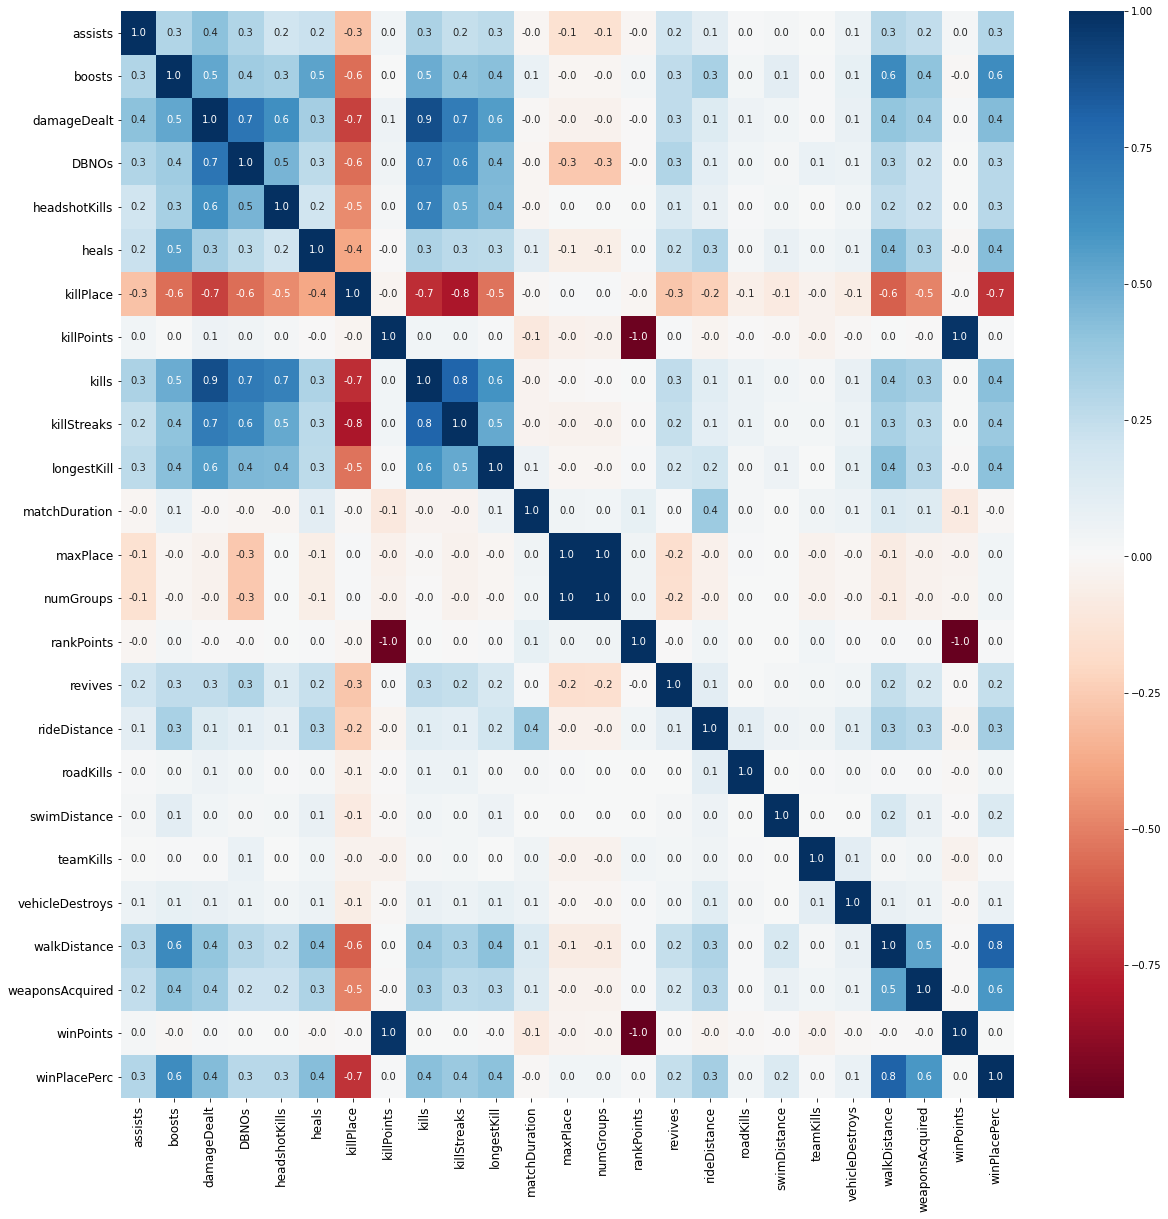

In [32]:
#displaying the heatmap for the correlation values of the dataset
plt.figure(figsize=(20,20))
sns.heatmap(Corr,annot=True,fmt='.1f',cmap='RdBu')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### The above heatmap shows us that kills,damageDealt,killPlace and killStreaks are highly dependent to each other. Whereas the values in heatmap which are 0 or closer to 0 are features that are independent with each other

## Final Conclusion

After performing the EDA on the above pubg dataset we come to the following points as conclusion:

1. Most of the players play in the squad-fpp matchType
2. The 0 kills count is very high 
3. As the number of kills are increasing the player count number is decreasing
4. The chances of winning the match increases with the number of kills as per the dataset
5. The players who are playing in squad-fpp are killing higher number of enemies 
6. The number of winning percentage for boosts is higher as compared to the heals
7. The chances of winning a match is higher when people are destroying vehicles

Therefore,EDA is really helpful in analysing and then visualizing any given dataset. After completing the EDA as we now get to know various observations and points about the dataset, we can use this knowledge to train a machine learning model with lower time and space complexity for highly accurate and precise predictive analysis.

Thank you for referring till the last

Jugal Deshmukh